## ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar los archivos ya limpios  trabajados en el ETL
df_games = pd.read_parquet('steam_games.parquet')
df_reviews = pd.read_parquet('user_reviews.parquet')
df_items = pd.read_parquet('user_items.parquet')

#### EDA del dataset Steam Games

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   27508 non-null  object 
 1   Price                  27508 non-null  float64
 2   Game_id                27508 non-null  float64
 3   Developer              27508 non-null  object 
 4   Release_year           27508 non-null  int64  
 5   Accounting             27508 non-null  int64  
 6   Action                 27508 non-null  int64  
 7   Adventure              27508 non-null  int64  
 8   Animation & Modeling   27508 non-null  int64  
 9   Audio Production       27508 non-null  int64  
 10  Casual                 27508 non-null  int64  
 11  Design & Illustration  27508 non-null  int64  
 12  Early Access           27508 non-null  int64  
 13  Education              27508 non-null  int64  
 14  Free to Play           27508 non-null  int64  
 15  In

In [3]:

# Lo primero que hago es una descripción general con valores estadísiticos
df_games.describe(include='all')


,Name,Price,Game_id,Developer,Release_year,Accounting,Action,Adventure,Animation & Modeling,Audio Production,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
count,27508,27508.000000,2.750800e+04,27508,27508.00000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,...,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000
unique,27490,NaN,NaN,10620,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Soundtrack,NaN,NaN,Ubisoft - San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,1258,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.006959,4.414198e+05,NaN,2014.86204,0.000254,0.387487,0.283554,0.006253,0.002981,...,0.002799,0.186091,0.038171,0.236477,0.003599,0.043878,0.243093,0.011597,0.003744,0.009452
std,NaN,15.973444,1.860741e+05,NaN,3.27765,0.015950,0.487185,0.450731,0.078828,0.054518,...,0.052834,0.389187,0.191612,0.424926,0.059884,0.204828,0.428959,0.107063,0.061078,0.096762
min,NaN,0.000000,1.000000e+01,NaN,1983.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.990000,3.168845e+05,NaN,2014.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,4.990000,4.367500e+05,NaN,2016.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,9.990000,5.873925e+05,NaN,2017.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Algunas observaciones que puedo extraer de esta primera exploración:
- Hay un total de 27.508, registros, que corresponden a 27.508 juegos. (valores únicos de Game_id)
- A pesar de lo anterior, puedo ver que no todos los valores de Name son únicos, así que seguramente hay juegos que son diferentes, pues su id es diferente, pero tienen el mismo nombre.
- Los precios varían entre 0 y 995, siendo 9 el valor promedio.

Quiero consultar la cantidad de juegos lanzados por año:

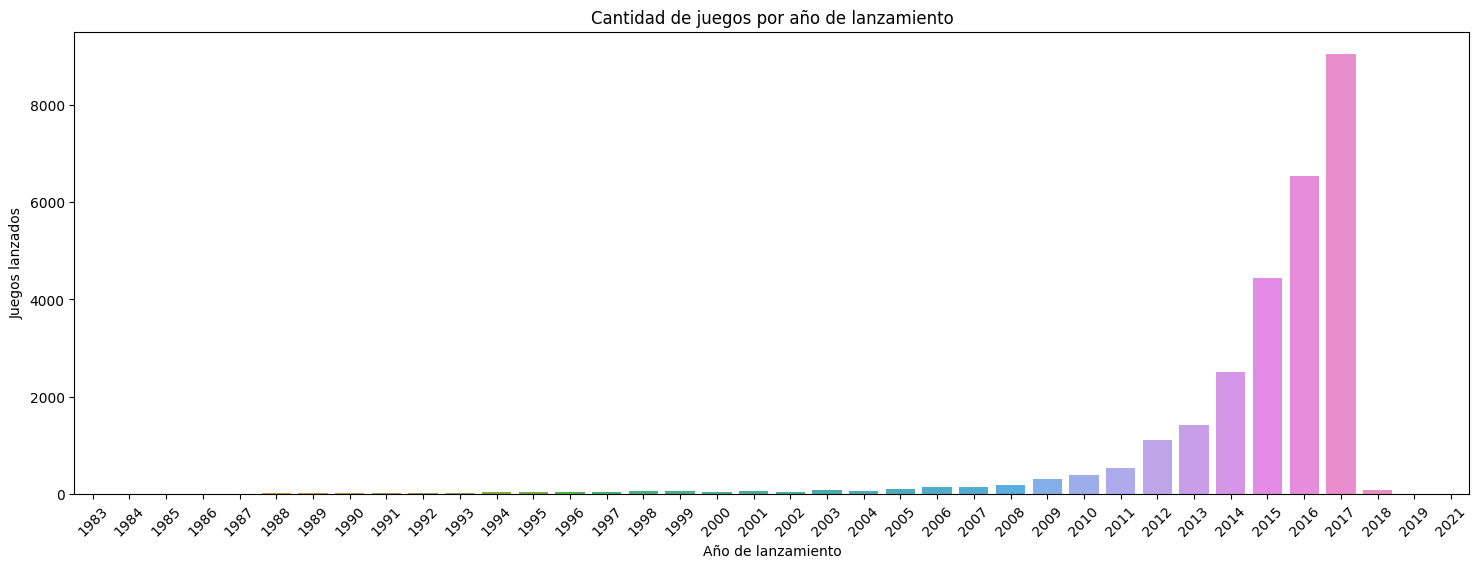

In [29]:
plt.figure(figsize=(18,6))
sns.countplot(data = df_games, x = "Release_year")
plt.xticks(rotation=45)
plt.ylabel('Juegos lanzados')
plt.xlabel('Año de lanzamiento')
plt.title('Cantidad de juegos por año de lanzamiento')
plt.show()

Ahora quiero observar y comparar la cantidad de juegos correspondientes a cada género

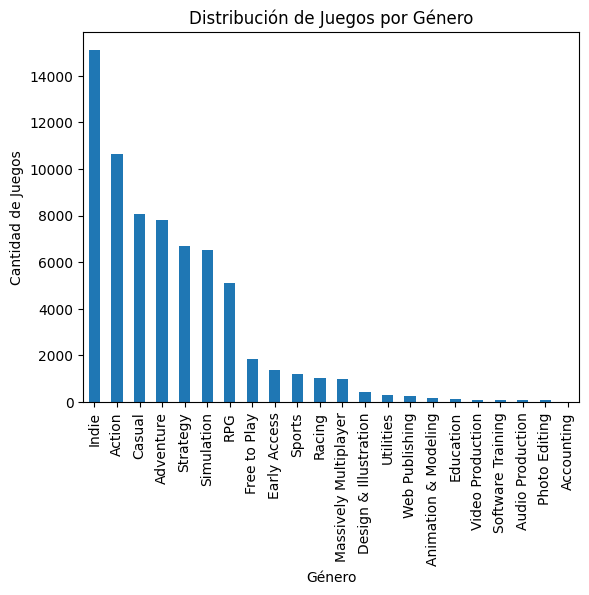

In [21]:
generos = df_games.drop(columns=['Name', 'Price', 'Game_id', 'Developer', 'Release_year'])
generos.sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Juegos por Género')
plt.show()

Quiero observar mejor cómo se encuentran distribuidos los precios de los juegos

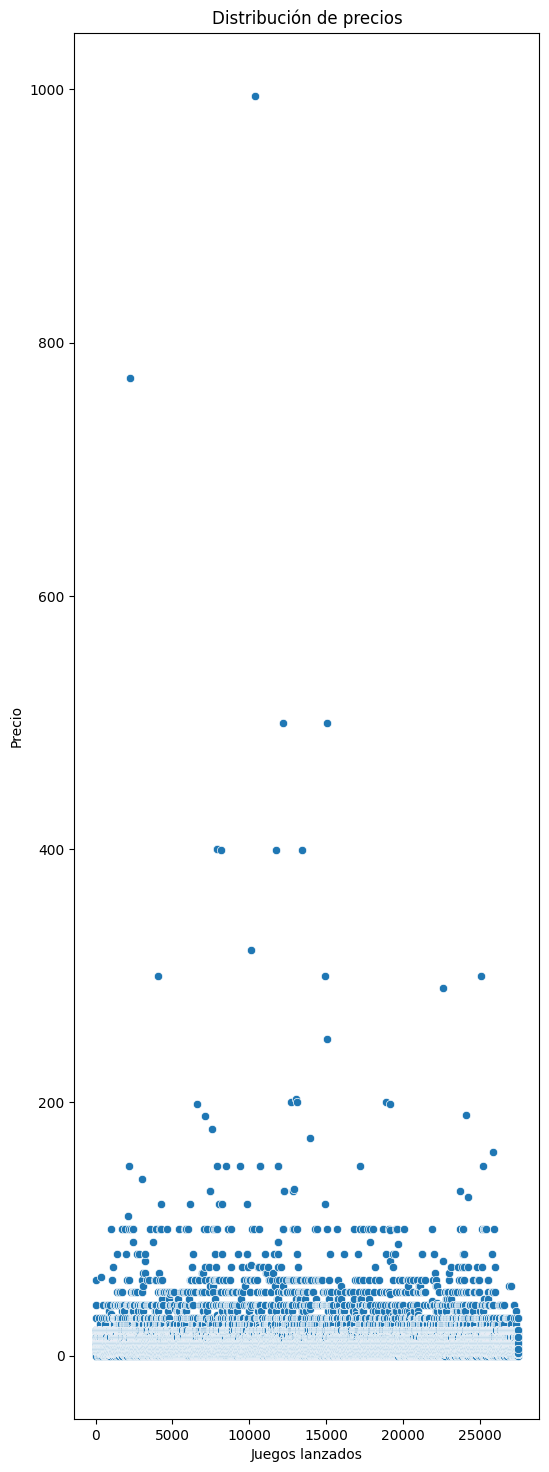

In [30]:
plt.figure(figsize=(6,18))
sns.scatterplot(data = df_games['Price'])
plt.ylabel('Precio')
plt.xlabel('Juegos lanzados')
plt.title('Distribución de precios')
plt.show()

A pesar de que la gráfica no es muy detallada, puedo notar fácilmente que muy pocos juegos están por encima de los $200 y que la gran mayoría se encuentran entre $0 y $50 aproximadamente.
Tal vez sea apropiado crear un nuevo dataset que deje por fuera los outliers, por ejemplo tomando sólo los juegos cuyo precio sea menor a $200 para utilizar en el sistema de recomendación.

In [33]:
df_SinOutliers200 = df_games[df_games['Price']<= 200]
df_SinOutliers200

,Name,Price,Game_id,Developer,Release_year,Accounting,Action,Adventure,Animation & Modeling,Audio Production,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,Lost Summoner Kitty,4.99,761140.0,Kotoshiro,2018,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,Ironbound,0.00,643980.0,Secret Level SRL,2018,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,2017,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,弹炸人2222,0.99,767400.0,彼岸领域,2017,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Battle Royale Trainer,3.99,772540.0,Trickjump Games Ltd,2018,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,Kebab it Up!,1.99,745400.0,Bidoniera Games,2018,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27504,Colony On Mars,1.99,773640.0,"Nikita ""Ghost_RUS""",2018,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
27505,LOGistICAL: South Africa,4.99,733530.0,Sacada,2018,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27506,Russian Roads,1.99,610660.0,Laush Dmitriy Sergeevich,2018,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


Puedo ver que de 27.508 juegos, son 27.492 los que se encuentran por debajo de los $200, casi todo el dataset. me da curiosidad saber cuántos están por debajo de los $100, voy a revisarlo.

In [34]:
df_SinOutliers100 = df_games[df_games['Price']<= 100]
df_SinOutliers100

,Name,Price,Game_id,Developer,Release_year,Accounting,Action,Adventure,Animation & Modeling,Audio Production,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,Lost Summoner Kitty,4.99,761140.0,Kotoshiro,2018,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,Ironbound,0.00,643980.0,Secret Level SRL,2018,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,2017,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,弹炸人2222,0.99,767400.0,彼岸领域,2017,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Battle Royale Trainer,3.99,772540.0,Trickjump Games Ltd,2018,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,Kebab it Up!,1.99,745400.0,Bidoniera Games,2018,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27504,Colony On Mars,1.99,773640.0,"Nikita ""Ghost_RUS""",2018,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
27505,LOGistICAL: South Africa,4.99,733530.0,Sacada,2018,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27506,Russian Roads,1.99,610660.0,Laush Dmitriy Sergeevich,2018,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


En conclusión, de los 27.508 juegos, 16 están por encima de los $200, 36 entre los $100 y los $200 y los demás por debajo de $100.

In [8]:
accounting = df_games[df_games['Accounting']==1]
accounting

,Name,Price,Game_id,Developer,Release_year,Accounting,Action,Adventure,Animation & Modeling,Audio Production,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
4756,Quicken Legal Business Pro,44.99,411350.0,Nolo,2015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7432,Quicken WillMaker Plus 2017,54.99,555810.0,Nolo,2016,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10115,MyMoney,0.00,677310.0,MING-CHIEN LEE,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10571,Quicken WillMaker Plus 2018,69.99,732710.0,Nolo,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13429,Multiplicity,19.99,620040.0,Stardock,2017,1,0,0,1,1,...,1,0,0,0,1,0,0,1,1,1
14578,Professor Teaches QuickBooks 2017,14.99,623590.0,Individual Software,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20462,Quicken WillMaker Plus 2016,59.99,411340.0,Nolo,2015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
